In [5]:
# 필요한 라이브러리 import 하기 

import pandas as pd #
import matplotlib.pyplot as plt #그래프를 그릴때 사용 
from matplotlib import font_manager, rc
import platform # 한글폰트를 지원하가위한 라이브러리

# 그래프에서 한글 표기를 위한 글자체 변경(윈도우, 맥os 각각의 경우에 대해서 처리)

if platform.system() == 'Windows': 
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
else: 
    print('Check your OS system')

In [6]:
# 1. 데이터 불러오기
test = pd.read_excel('data/kto_201801.xlsx') #''안에 커서대고 tab 키
test # shift + enter

,기준년월,국적,관광,상용,공용,유학/연수,기타,계,전년동기,성장률(%),구성비(%)
0,2018-01,아시아주,631714.0,11822.0,1276.0,11991.0,118220.0,775023.0,1040034.0,-25.5,81.1
1,2018-01,일본,159174.0,2357.0,138.0,842.0,4572.0,167083.0,154862.0,7.9,17.5
2,2018-01,대만,74322.0,93.0,18.0,158.0,1229.0,75820.0,69623.0,8.9,7.9
3,2018-01,홍콩,33634.0,44.0,2.0,72.0,919.0,34671.0,55524.0,-37.6,3.6
4,2018-01,마카오,2885.0,3.0,0.0,13.0,32.0,2933.0,4590.0,-36.1,0.3
...,...,...,...,...,...,...,...,...,...,...,...
66,2018-01,교포,0.0,0.0,0.0,0.0,19196.0,19196.0,19428.0,-1.2,2.0
67,2018-01,계,742732.0,14663.0,4126.0,13858.0,180657.0,956036.0,NaN,NaN,NaN
68,2018-01,전년동기,978223.0,15248.0,3649.0,10378.0,213197.0,1220695.0,NaN,NaN,NaN
69,2018-01,성장률(%),-24.1,-3.8,13.1,33.5,-15.3,-21.7,NaN,NaN,NaN


In [8]:
#2. 반복문 format 함수 활용하기
for i in ['01', '02', '03']:
    print('data/kto_2018{}.xlsx'.format(i))

data/kto_201801.xlsx
data/kto_201802.xlsx
data/kto_201803.xlsx


In [9]:
# 3. 반복문이랑 format 함수를 활용해서 여러 개의 엑셀파일 합치기
result = pd.DataFrame()

for i in ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']:
    path = 'data/kto_2018{}.xlsx'.format(i)
    
    temp = pd.read_excel(path)
    result = result.append(temp)
    
result 

,기준년월,국적,관광,상용,공용,유학/연수,기타,계,전년동기,성장률(%),구성비(%)
0,2018-01,아시아주,631714.0,11822.0,1276.0,11991.0,118220.0,775023.0,1040034.0,-25.5,81.1
1,2018-01,일본,159174.0,2357.0,138.0,842.0,4572.0,167083.0,154862.0,7.9,17.5
2,2018-01,대만,74322.0,93.0,18.0,158.0,1229.0,75820.0,69623.0,8.9,7.9
3,2018-01,홍콩,33634.0,44.0,2.0,72.0,919.0,34671.0,55524.0,-37.6,3.6
4,2018-01,마카오,2885.0,3.0,0.0,13.0,32.0,2933.0,4590.0,-36.1,0.3
...,...,...,...,...,...,...,...,...,...,...,...
66,2018-12,교포,0.0,0.0,0.0,0.0,18838.0,18838.0,22416.0,-16.0,1.4
67,2018-12,계,1112381.0,12965.0,5331.0,19162.0,174280.0,1324119.0,NaN,NaN,NaN
68,2018-12,전년동기,925938.0,13156.0,4338.0,17858.0,172778.0,1134068.0,NaN,NaN,NaN
69,2018-12,성장률(%),20.1,-1.5,22.9,7.3,0.9,16.8,NaN,NaN,NaN


In [12]:
#4 중국 국적 데이터만 필터링하기
condition = (result.국적 == '중국')

result_filter = result[condition]
result_filter

,기준년월,국적,관광,상용,공용,유학/연수,기타,계,전년동기,성장률(%),구성비(%)
18,2018-01,중국,236825.0,3363.0,119.0,7190.0,57630.0,305127.0,565243.0,-46.0,31.9
18,2018-02,중국,237075.0,2356.0,284.0,34899.0,70727.0,345341.0,590790.0,-41.5,33.0
18,2018-03,중국,281020.0,3331.0,259.0,30621.0,88182.0,403413.0,360782.0,11.8,29.5
18,2018-04,중국,283533.0,3682.0,240.0,9833.0,69316.0,366604.0,227811.0,60.9,27.5
18,2018-05,중국,284317.0,3847.0,323.0,13759.0,67976.0,370222.0,253359.0,46.1,29.9
18,2018-06,중국,303405.0,3397.0,285.0,11871.0,60933.0,379891.0,254930.0,49.0,29.6
18,2018-07,중국,332657.0,3687.0,289.0,9919.0,63785.0,410337.0,281263.0,45.9,32.7
18,2018-08,중국,360982.0,3538.0,295.0,39061.0,74264.0,478140.0,339388.0,40.9,34.4
18,2018-09,중국,326438.0,3834.0,549.0,25601.0,78173.0,434595.0,318682.0,36.4,34.0
18,2018-10,중국,382922.0,4008.0,484.0,10656.0,77237.0,475307.0,345384.0,37.6,31.1


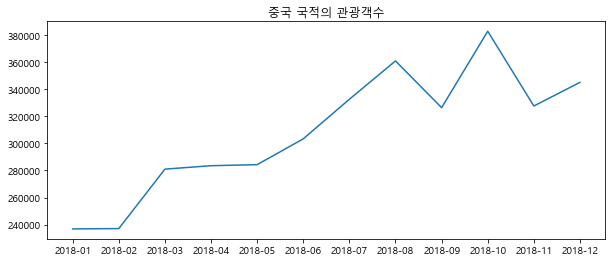

In [18]:
#5. 중국 국적의 관광객 수를 그래프로 그려보기

condition = (result.국적 == '중국')

result_filter = result[condition]

plt.figure(figsize = (10,4))
plt.plot(result_filter.기준년월, result_filter.관광) #x축 기준년월 y축 관광
plt.title('중국 국적의 관광객수')
plt.show()

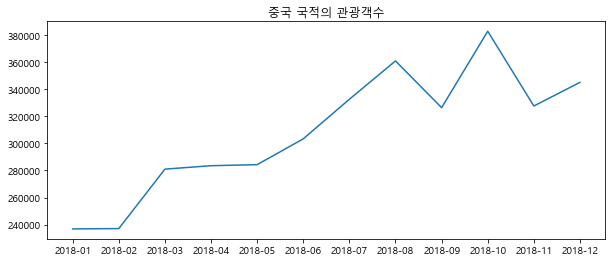

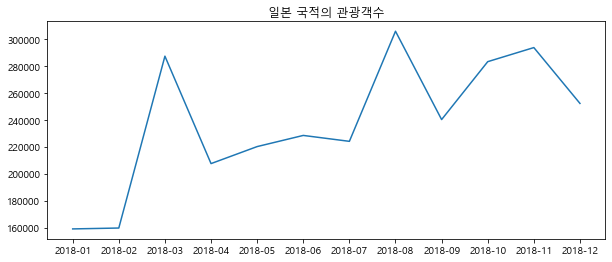

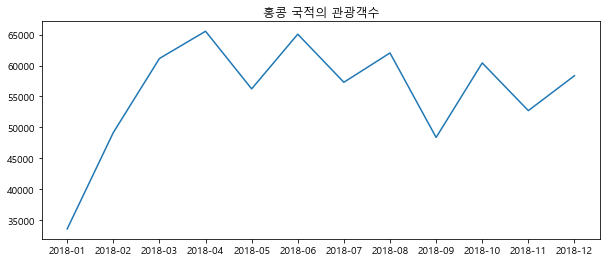

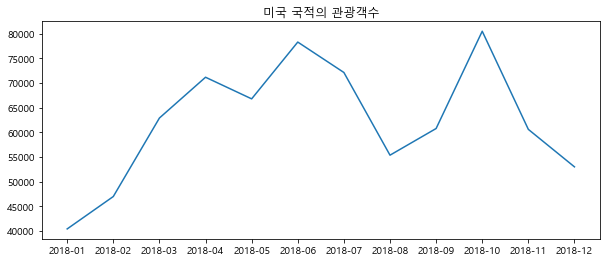

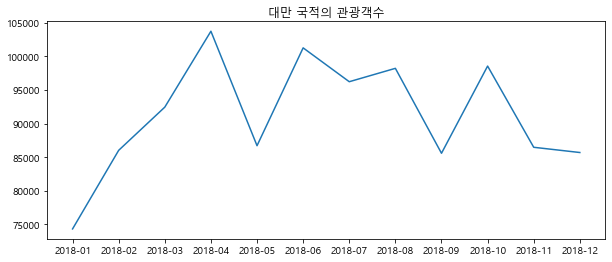

In [16]:
#5-2. 중국 국적의 관광객 수를 그래프로 그려보기
for country in ['중국', '일본', '홍콩', '미국', '대만']:
    condition = (result.국적 ==  country)

    result_filter = result[condition]

    plt.figure(figsize = (10,4))
    plt.plot(result_filter.기준년월, result_filter.관광) #x축 기준년월 y축 관광
    plt.title('{} 국적의 관광객수'.format(country))
    plt.show()

In [19]:
# 엑셀로 저장하기
result.to_excel('result.xlsx')

In [ ]:
#6. 반복문을 통해서 그래프 여러개를 한번에 그리기
for country in ['중국', '일본', '홍콩', '미국', '대만']

# 렛츠기릿~

In [ ]:

######################################
## [Exercise] 1. 엑셀 데이터 파이썬으로 불러오기  ##
######################################
# 여기에서 실습하시다 헷갈리시면 아래 Solution cell 에서 복사하세요~





In [ ]:
# # [Solution] 1. 엑셀 데이터 파이썬으로 불러오기 

# test = pd.read_excel('data/kto_201801.xlsx')
# test

In [ ]:

#####################################
## [Exercise] 2. 반복문과 format 함수 활용하기  ##
#####################################
# 여기에서 실습하시다 헷갈리시면 아래 Solution cell 에서 복사하세요~





In [ ]:
# # [Solution] 2. 반복문과 format 함수 활용하기 

# for i in ['01', '02', '03']:
#     print('./data/kto_2018{}.xlsx'.format(i))

In [ ]:

#########################################################
## [Exercise] 3. 반복문으로 format 함수 활용해서 여러 개의 엑셀파일 합치기  ##
#########################################################
# 여기에서 실습하시다 헷갈리시면 아래 Solution cell 에서 복사하세요~





In [ ]:
# [Solution] 3. 반복문으로 format 함수 활용해서 여러 개의 엑셀파일 합치기 

# df = pd.DataFrame()
# for i in ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']:
#     path = './data/kto_2018{}.xlsx'.format(i)
#     temp = pd.read_excel(path)
    
#     df = df.append(temp)

# df

In [ ]:

####################################
## [Exercise] 4. 중국 국적 데이터만 필터링하기  ##
####################################
# 여기에서 실습하시다 헷갈리시면 아래 Solution cell 에서 복사하세요~





In [ ]:

####################################
## [Solution] 4. 중국 국적 데이터만 필터링하기  ##
####################################
# condition = (df.국적 == '중국') 
# cd_data = df[condition]
# cd_data

# plt.figure(figsize=(10,4) )
# plt.plot(cd_data.기준년월, cd_data.관광)
# plt.title('중국인 관광객 추이')
# plt.show()


In [ ]:

#############################################
## [Exercise] 5. 중국 국적의 관광객 수를 그래프로 그려보기  ##
#############################################
# 여기에서 실습하시다 헷갈리시면 아래 Solution cell 에서 복사하세요~





In [ ]:
# [Solution] 5. 중국 국적의 관광객 수를 그래프로 그려보기 
# condition = (df.국적 == '중국') 
# cd_data = df[condition]

# plt.figure(figsize=(10,4))
# plt.plot(cd_data.기준년월, cd_data.관광, marker='o')
# plt.title('중국 국적의 18년 관광객 추이')
# plt.show()

In [ ]:

###############################################
## [Exercise] 6. 반복문을 통해서 그래프 여러개 한 번에 그리기  ##
###############################################
# 여기에서 실습하시다 헷갈리시면 아래 Solution cell 에서 복사하세요~


    




In [ ]:
# [Solution] 6. 반복문을 통해서 그래프 여러개 한 번에 그리기 
# for cntry in['중국', '일본', '홍콩', '대만', '미국']: 
#     condition = (df.국적 == cntry) 
#     cd_data = df[condition]

#     plt.figure(figsize=(10,4))
#     plt.plot(cd_data.기준년월, cd_data.관광, marker='o')
#     plt.title('{} 국적의 18년 관광객 추이'.format(cntry))
#     plt.show()
